In [1]:
# import packages
import os 
import pickle

import re
from datetime import datetime

import requests

import pytz

import pandas as pd
import numpy as np

import ast

import pyspark.sql.functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import *


import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# import findspark
import findspark

# initialize findspark with spark directory

#ALWAYS HAVE TO BE CHANGED 
findspark.init("/Users/wouterdewitte/spark/")

# import pyspark
import pyspark
# create spark context
sc = pyspark.SparkContext()
# create spark session 
spark = pyspark.sql.SparkSession(sc)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/11/21 13:21:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/11/21 13:21:20 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
spark

In [6]:
#set this path to your path, for some reason I have an error 
#reading in all the files
import os 
path_json = ".././../data/Topic_vegan/*.json"

In [7]:
df_json = spark.read.json(path_json)

22/11/21 13:22:54 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [5]:
# select interesting features
import pyspark.sql.functions as F

df = df_json.select(F.col("user.name"),
                                F.col("user.screen_name"),
                                F.col("created_at"), 
                                F.col("full_text"),
                                F.col("entities.hashtags"),
                                F.col("lang"),
                                F.col("favorite_count"),
                                F.col("user.followers_count"),
                                F.col("user.friends_count"),
                                F.col("user.favourites_count"),
                                F.col("entities.urls"),
                                F.col("entities.symbols"),
                                F.col("retweet_count"),
                                F.col("favorite_count"))
df.limit(10).toPandas()

NameError: name 'df_json' is not defined

In [9]:
# remove duplicates and retweets
df = df.filter(~F.col("full_text").startswith("RT")) \
                               .drop_duplicates() \
                               .cache()

In [10]:
# https://developer.twitter.com/en/docs/twitter-ads-api/timezones
# function to convert Twitter date string format
def getDate(date):
    if date is not None:
        return str(datetime.strptime(date,'%a %b %d %H:%M:%S +0000 %Y').replace(tzinfo=pytz.UTC).strftime("%Y-%m-%d %H:%M:%S"))
    else:
        return None

# UDF declaration
date_udf = F.udf(getDate, StringType())

# apply udf
df = df.withColumn('post_created_at', F.to_utc_timestamp(date_udf("created_at"), "UTC"))

In [10]:
# get first post
first_post = F.min('post_created_at').alias('earliest')
# get latest post
latest_post = F.max('post_created_at').alias('latest')
# show tweet period in our dataset
df.select(first_post, latest_post).show()

22/11/21 10:34:45 WARN MemoryStore: Not enough space to cache rdd_17_96 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:45 WARN BlockManager: Persisting block rdd_17_96 to disk instead.
22/11/21 10:34:45 WARN MemoryStore: Not enough space to cache rdd_17_96 in memory! (computed 3.9 MiB so far)


22/11/21 10:34:46 WARN MemoryStore: Not enough space to cache rdd_17_98 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:46 WARN BlockManager: Persisting block rdd_17_98 to disk instead.
22/11/21 10:34:46 WARN MemoryStore: Not enough space to cache rdd_17_99 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:46 WARN BlockManager: Persisting block rdd_17_99 to disk instead.


22/11/21 10:34:47 WARN MemoryStore: Not enough space to cache rdd_17_104 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:47 WARN BlockManager: Persisting block rdd_17_104 to disk instead.
22/11/21 10:34:47 WARN MemoryStore: Not enough space to cache rdd_17_105 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:47 WARN BlockManager: Persisting block rdd_17_105 to disk instead.


22/11/21 10:34:48 WARN MemoryStore: Not enough space to cache rdd_17_106 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:48 WARN BlockManager: Persisting block rdd_17_106 to disk instead.
22/11/21 10:34:48 WARN MemoryStore: Not enough space to cache rdd_17_106 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:48 WARN MemoryStore: Not enough space to cache rdd_17_108 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:48 WARN BlockManager: Persisting block rdd_17_108 to disk instead.
22/11/21 10:34:48 WARN MemoryStore: Not enough space to cache rdd_17_110 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:48 WARN BlockManager: Persisting block rdd_17_110 to disk instead.


22/11/21 10:34:49 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_17_113 in memory.
22/11/21 10:34:49 WARN MemoryStore: Not enough space to cache rdd_17_113 in memory! (computed 384.0 B so far)
22/11/21 10:34:49 WARN BlockManager: Persisting block rdd_17_113 to disk instead.


22/11/21 10:34:49 WARN MemoryStore: Not enough space to cache rdd_17_115 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:49 WARN BlockManager: Persisting block rdd_17_115 to disk instead.
22/11/21 10:34:49 WARN MemoryStore: Not enough space to cache rdd_17_115 in memory! (computed 3.9 MiB so far)


22/11/21 10:34:51 WARN MemoryStore: Not enough space to cache rdd_17_120 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:51 WARN BlockManager: Persisting block rdd_17_120 to disk instead.
22/11/21 10:34:51 WARN MemoryStore: Not enough space to cache rdd_17_121 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:51 WARN BlockManager: Persisting block rdd_17_121 to disk instead.


22/11/21 10:34:51 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_17_124 in memory.
22/11/21 10:34:51 WARN MemoryStore: Not enough space to cache rdd_17_124 in memory! (computed 384.0 B so far)
22/11/21 10:34:51 WARN BlockManager: Persisting block rdd_17_124 to disk instead.


22/11/21 10:34:53 WARN MemoryStore: Not enough space to cache rdd_17_129 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:53 WARN BlockManager: Persisting block rdd_17_129 to disk instead.
22/11/21 10:34:53 WARN MemoryStore: Not enough space to cache rdd_17_130 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:53 WARN BlockManager: Persisting block rdd_17_130 to disk instead.


22/11/21 10:34:53 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_17_133 in memory.
22/11/21 10:34:53 WARN MemoryStore: Not enough space to cache rdd_17_133 in memory! (computed 384.0 B so far)
22/11/21 10:34:53 WARN BlockManager: Persisting block rdd_17_133 to disk instead.


22/11/21 10:34:55 WARN MemoryStore: Not enough space to cache rdd_17_137 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:55 WARN BlockManager: Persisting block rdd_17_137 to disk instead.
22/11/21 10:34:55 WARN MemoryStore: Not enough space to cache rdd_17_138 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:55 WARN BlockManager: Persisting block rdd_17_138 to disk instead.


22/11/21 10:34:55 WARN MemoryStore: Not enough space to cache rdd_17_139 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:55 WARN BlockManager: Persisting block rdd_17_139 to disk instead.
22/11/21 10:34:55 WARN MemoryStore: Not enough space to cache rdd_17_141 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:55 WARN BlockManager: Persisting block rdd_17_141 to disk instead.
22/11/21 10:34:55 WARN MemoryStore: Not enough space to cache rdd_17_142 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:55 WARN BlockManager: Persisting block rdd_17_142 to disk instead.


22/11/21 10:34:57 WARN MemoryStore: Not enough space to cache rdd_17_150 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:57 WARN BlockManager: Persisting block rdd_17_150 to disk instead.


22/11/21 10:34:59 WARN MemoryStore: Not enough space to cache rdd_17_152 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:59 WARN BlockManager: Persisting block rdd_17_152 to disk instead.
22/11/21 10:34:59 WARN MemoryStore: Not enough space to cache rdd_17_153 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:59 WARN BlockManager: Persisting block rdd_17_153 to disk instead.
22/11/21 10:34:59 WARN MemoryStore: Not enough space to cache rdd_17_153 in memory! (computed 3.9 MiB so far)


22/11/21 10:34:59 WARN MemoryStore: Not enough space to cache rdd_17_155 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:59 WARN BlockManager: Persisting block rdd_17_155 to disk instead.
22/11/21 10:34:59 WARN MemoryStore: Not enough space to cache rdd_17_157 in memory! (computed 3.9 MiB so far)
22/11/21 10:34:59 WARN BlockManager: Persisting block rdd_17_157 to disk instead.
22/11/21 10:35:00 WARN MemoryStore: Not enough space to cache rdd_17_158 in memory! (computed 3.9 MiB so far)
22/11/21 10:35:00 WARN BlockManager: Persisting block rdd_17_158 to disk instead.
22/11/21 10:35:00 WARN MemoryStore: Not enough space to cache rdd_17_158 in memory! (computed 3.9 MiB so far)


In [4]:
df_json.printSchema()

NameError: name 'df' is not defined

# The evolution of tweet activity

Look at the frequency of tweets per month.

In [63]:
freq_month = df.withColumn('month', month('post_created_at'))

In [64]:
freq_month = freq_month.groupBy("month") \
                        .agg(countDistinct("full_text")) \
                        .withColumnRenamed("count(full_text)", "freq") \
                        .sort("month", ascending = True)

In [65]:
freq_month = freq_month.toPandas()

22/11/21 10:53:37 WARN MemoryStore: Not enough space to cache rdd_17_46 in memory! (computed 3.9 MiB so far)
22/11/21 10:53:37 WARN MemoryStore: Not enough space to cache rdd_17_47 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:39 WARN MemoryStore: Not enough space to cache rdd_17_51 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:39 WARN MemoryStore: Not enough space to cache rdd_17_54 in memory! (computed 3.9 MiB so far)
22/11/21 10:53:39 WARN MemoryStore: Not enough space to cache rdd_17_55 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:41 WARN MemoryStore: Not enough space to cache rdd_17_60 in memory! (computed 3.9 MiB so far)
22/11/21 10:53:41 WARN MemoryStore: Not enough space to cache rdd_17_61 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:41 WARN MemoryStore: Not enough space to cache rdd_17_63 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:42 WARN MemoryStore: Not enough space to cache rdd_17_68 in memory! (computed 3.9 MiB so far)
22/11/21 10:53:42 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_17_69 in memory.
22/11/21 10:53:42 WARN MemoryStore: Not enough space to cache rdd_17_69 in memory! (computed 384.0 B so far)


22/11/21 10:53:43 WARN MemoryStore: Not enough space to cache rdd_17_71 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:44 WARN MemoryStore: Not enough space to cache rdd_17_75 in memory! (computed 3.9 MiB so far)
22/11/21 10:53:44 WARN MemoryStore: Not enough space to cache rdd_17_78 in memory! (computed 3.9 MiB so far)
22/11/21 10:53:44 WARN MemoryStore: Not enough space to cache rdd_17_79 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:46 WARN MemoryStore: Not enough space to cache rdd_17_82 in memory! (computed 3.9 MiB so far)
22/11/21 10:53:46 WARN MemoryStore: Not enough space to cache rdd_17_84 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:46 WARN MemoryStore: Not enough space to cache rdd_17_87 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:48 WARN MemoryStore: Not enough space to cache rdd_17_94 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:50 WARN MemoryStore: Not enough space to cache rdd_17_98 in memory! (computed 3.9 MiB so far)
22/11/21 10:53:50 WARN MemoryStore: Not enough space to cache rdd_17_99 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:50 WARN MemoryStore: Not enough space to cache rdd_17_102 in memory! (computed 3.9 MiB so far)
22/11/21 10:53:50 WARN MemoryStore: Not enough space to cache rdd_17_103 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:51 WARN MemoryStore: Not enough space to cache rdd_17_107 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:52 WARN MemoryStore: Not enough space to cache rdd_17_110 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:53 WARN MemoryStore: Not enough space to cache rdd_17_114 in memory! (computed 3.9 MiB so far)
22/11/21 10:53:53 WARN MemoryStore: Not enough space to cache rdd_17_115 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:53 WARN MemoryStore: Not enough space to cache rdd_17_118 in memory! (computed 3.9 MiB so far)
22/11/21 10:53:54 WARN MemoryStore: Not enough space to cache rdd_17_119 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:55 WARN MemoryStore: Not enough space to cache rdd_17_122 in memory! (computed 3.9 MiB so far)
22/11/21 10:53:55 WARN MemoryStore: Not enough space to cache rdd_17_123 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:55 WARN MemoryStore: Not enough space to cache rdd_17_126 in memory! (computed 3.9 MiB so far)
22/11/21 10:53:55 WARN MemoryStore: Not enough space to cache rdd_17_127 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:57 WARN MemoryStore: Not enough space to cache rdd_17_130 in memory! (computed 3.9 MiB so far)
22/11/21 10:53:57 WARN MemoryStore: Not enough space to cache rdd_17_131 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:57 WARN MemoryStore: Not enough space to cache rdd_17_135 in memory! (computed 3.9 MiB so far)
22/11/21 10:53:58 WARN MemoryStore: Not enough space to cache rdd_17_138 in memory! (computed 3.9 MiB so far)
22/11/21 10:53:58 WARN MemoryStore: Not enough space to cache rdd_17_139 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:59 WARN MemoryStore: Not enough space to cache rdd_17_141 in memory! (computed 3.9 MiB so far)


22/11/21 10:53:59 WARN MemoryStore: Not enough space to cache rdd_17_143 in memory! (computed 3.9 MiB so far)


22/11/21 10:54:00 WARN MemoryStore: Not enough space to cache rdd_17_146 in memory! (computed 3.9 MiB so far)
22/11/21 10:54:00 WARN MemoryStore: Not enough space to cache rdd_17_147 in memory! (computed 3.9 MiB so far)


22/11/21 10:54:00 WARN MemoryStore: Not enough space to cache rdd_17_149 in memory! (computed 3.9 MiB so far)


22/11/21 10:54:01 WARN MemoryStore: Not enough space to cache rdd_17_151 in memory! (computed 3.9 MiB so far)
22/11/21 10:54:02 WARN MemoryStore: Not enough space to cache rdd_17_154 in memory! (computed 3.9 MiB so far)
22/11/21 10:54:02 WARN MemoryStore: Not enough space to cache rdd_17_155 in memory! (computed 3.9 MiB so far)


22/11/21 10:54:02 WARN MemoryStore: Not enough space to cache rdd_17_158 in memory! (computed 3.9 MiB so far)
22/11/21 10:54:02 WARN MemoryStore: Not enough space to cache rdd_17_159 in memory! (computed 3.9 MiB so far)


22/11/21 10:54:04 WARN MemoryStore: Not enough space to cache rdd_17_162 in memory! (computed 3.9 MiB so far)
22/11/21 10:54:04 WARN MemoryStore: Not enough space to cache rdd_17_163 in memory! (computed 3.9 MiB so far)
22/11/21 10:54:04 WARN MemoryStore: Not enough space to cache rdd_17_166 in memory! (computed 3.9 MiB so far)
22/11/21 10:54:04 WARN MemoryStore: Not enough space to cache rdd_17_167 in memory! (computed 3.9 MiB so far)


22/11/21 10:54:05 WARN MemoryStore: Not enough space to cache rdd_17_171 in memory! (computed 3.9 MiB so far)


22/11/21 10:54:06 WARN MemoryStore: Not enough space to cache rdd_17_174 in memory! (computed 3.9 MiB so far)
22/11/21 10:54:06 WARN MemoryStore: Not enough space to cache rdd_17_175 in memory! (computed 3.9 MiB so far)
22/11/21 10:54:07 WARN MemoryStore: Not enough space to cache rdd_17_179 in memory! (computed 3.9 MiB so far)


22/11/21 10:54:07 WARN MemoryStore: Not enough space to cache rdd_17_181 in memory! (computed 3.9 MiB so far)


22/11/21 10:54:08 WARN MemoryStore: Not enough space to cache rdd_17_183 in memory! (computed 3.9 MiB so far)


22/11/21 10:54:09 WARN MemoryStore: Not enough space to cache rdd_17_186 in memory! (computed 3.9 MiB so far)
22/11/21 10:54:09 WARN MemoryStore: Not enough space to cache rdd_17_187 in memory! (computed 3.9 MiB so far)


22/11/21 10:54:09 WARN MemoryStore: Not enough space to cache rdd_17_189 in memory! (computed 3.9 MiB so far)


22/11/21 10:54:11 WARN MemoryStore: Not enough space to cache rdd_17_193 in memory! (computed 3.9 MiB so far)
22/11/21 10:54:11 WARN MemoryStore: Not enough space to cache rdd_17_195 in memory! (computed 3.9 MiB so far)


22/11/21 10:54:11 WARN MemoryStore: Not enough space to cache rdd_17_198 in memory! (computed 3.9 MiB so far)


22/11/21 10:54:13 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/11/21 10:54:13 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/11/21 10:54:13 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/11/21 10:54:13 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/11/21 10:54:13 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/11/21 10:54:13 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/11/21 10:54:13 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/11/21 10:54:13 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/11/21 10:54:13 WARN RowBasedKeyValueBatch: Calling spill() on

<AxesSubplot:xlabel='month'>

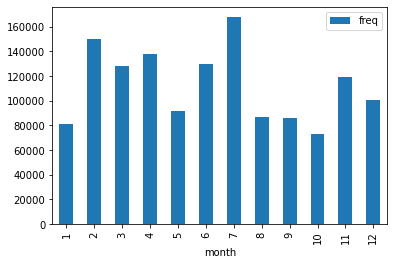

In [66]:
freq_month.plot.bar(x='month', y='freq') 

Look at the frequency of tweets per week.

In [68]:
freq_week = df.withColumn('week', weekofyear('post_created_at'))

In [69]:
freq_week = freq_week.groupBy("week") \
                        .agg(countDistinct("full_text")) \
                        .withColumnRenamed("count(full_text)", "freq") \
                        .sort("week", ascending = True)

In [72]:
freq_week = freq_week.toPandas()

22/11/21 11:03:57 WARN MemoryStore: Not enough space to cache rdd_17_47 in memory! (computed 3.9 MiB so far)


22/11/21 11:03:59 WARN MemoryStore: Not enough space to cache rdd_17_50 in memory! (computed 3.9 MiB so far)


22/11/21 11:03:59 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_17_55 in memory.
22/11/21 11:03:59 WARN MemoryStore: Not enough space to cache rdd_17_55 in memory! (computed 384.0 B so far)
22/11/21 11:04:01 WARN MemoryStore: Not enough space to cache rdd_17_58 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:01 WARN MemoryStore: Not enough space to cache rdd_17_62 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:01 WARN MemoryStore: Not enough space to cache rdd_17_63 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:03 WARN MemoryStore: Not enough space to cache rdd_17_70 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:03 WARN MemoryStore: Not enough space to cache rdd_17_71 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:04 WARN MemoryStore: Not enough space to cache rdd_17_75 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:04 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_17_79 in memory.
22/11/21 11:04:04 WARN MemoryStore: Not enough space to cache rdd_17_79 in memory! (computed 384.0 B so far)
22/11/21 11:04:06 WARN MemoryStore: Not enough space to cache rdd_17_82 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:06 WARN MemoryStore: Not enough space to cache rdd_17_85 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:06 WARN MemoryStore: Not enough space to cache rdd_17_86 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:08 WARN MemoryStore: Not enough space to cache rdd_17_90 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:08 WARN MemoryStore: Not enough space to cache rdd_17_93 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:08 WARN MemoryStore: Not enough space to cache rdd_17_94 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:09 WARN MemoryStore: Not enough space to cache rdd_17_97 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:10 WARN MemoryStore: Not enough space to cache rdd_17_103 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:11 WARN MemoryStore: Not enough space to cache rdd_17_106 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:12 WARN MemoryStore: Not enough space to cache rdd_17_110 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:12 WARN MemoryStore: Not enough space to cache rdd_17_111 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:13 WARN MemoryStore: Not enough space to cache rdd_17_113 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:13 WARN MemoryStore: Not enough space to cache rdd_17_116 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:13 WARN MemoryStore: Not enough space to cache rdd_17_119 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:15 WARN MemoryStore: Not enough space to cache rdd_17_122 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:15 WARN MemoryStore: Not enough space to cache rdd_17_125 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:15 WARN MemoryStore: Not enough space to cache rdd_17_126 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:15 WARN MemoryStore: Not enough space to cache rdd_17_127 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:16 WARN MemoryStore: Not enough space to cache rdd_17_130 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:17 WARN MemoryStore: Not enough space to cache rdd_17_134 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:17 WARN MemoryStore: Not enough space to cache rdd_17_135 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:18 WARN MemoryStore: Not enough space to cache rdd_17_138 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:19 WARN MemoryStore: Not enough space to cache rdd_17_142 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:20 WARN MemoryStore: Not enough space to cache rdd_17_146 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:21 WARN MemoryStore: Not enough space to cache rdd_17_150 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:21 WARN MemoryStore: Not enough space to cache rdd_17_151 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:22 WARN MemoryStore: Not enough space to cache rdd_17_153 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:22 WARN MemoryStore: Not enough space to cache rdd_17_155 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:22 WARN MemoryStore: Not enough space to cache rdd_17_157 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:22 WARN MemoryStore: Not enough space to cache rdd_17_159 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:24 WARN MemoryStore: Not enough space to cache rdd_17_162 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:24 WARN MemoryStore: Not enough space to cache rdd_17_167 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:25 WARN MemoryStore: Not enough space to cache rdd_17_170 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:25 WARN MemoryStore: Not enough space to cache rdd_17_171 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:26 WARN MemoryStore: Not enough space to cache rdd_17_175 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:27 WARN MemoryStore: Not enough space to cache rdd_17_177 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:27 WARN MemoryStore: Not enough space to cache rdd_17_179 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:28 WARN MemoryStore: Not enough space to cache rdd_17_182 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:28 WARN MemoryStore: Not enough space to cache rdd_17_183 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:29 WARN MemoryStore: Not enough space to cache rdd_17_186 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:29 WARN MemoryStore: Not enough space to cache rdd_17_187 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:29 WARN MemoryStore: Not enough space to cache rdd_17_189 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:29 WARN MemoryStore: Not enough space to cache rdd_17_191 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:31 WARN MemoryStore: Not enough space to cache rdd_17_194 in memory! (computed 3.9 MiB so far)
22/11/21 11:04:31 WARN MemoryStore: Not enough space to cache rdd_17_195 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:31 WARN MemoryStore: Not enough space to cache rdd_17_198 in memory! (computed 3.9 MiB so far)


22/11/21 11:04:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/11/21 11:04:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/11/21 11:04:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/11/21 11:04:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/11/21 11:04:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/11/21 11:04:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/11/21 11:04:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/11/21 11:04:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/11/21 11:04:33 WARN RowBasedKeyValueBatch: Calling spill() on

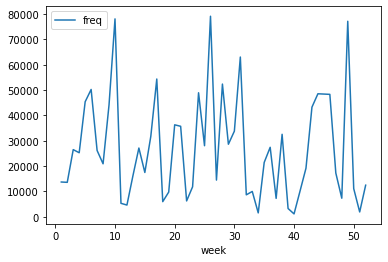

In [74]:
freq_week.plot.line(x='week', y='freq') 
plt.show()

# The evolution of tweet engagement 

In [37]:
eng_weekly = df.withColumn('week', weekofyear('post_created_at'))

In [38]:
eng_weekly = eng_weekly.groupBy("week") \
                        .agg(sum("retweet_count").alias("retweets"), sum("favorite_count").alias("favorites")) \
                        .sort("week", ascending = True)

In [39]:
eng_weekly.show()

22/11/21 11:44:33 WARN MemoryStore: Not enough space to cache rdd_25_7 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:34 WARN MemoryStore: Not enough space to cache rdd_25_10 in memory! (computed 3.8 MiB so far)
22/11/21 11:44:35 WARN MemoryStore: Not enough space to cache rdd_25_14 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:35 WARN MemoryStore: Not enough space to cache rdd_25_15 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:36 WARN MemoryStore: Not enough space to cache rdd_25_19 in memory! (computed 3.8 MiB so far)
22/11/21 11:44:36 WARN MemoryStore: Not enough space to cache rdd_25_16 in memory! (computed 3.8 MiB so far)
22/11/21 11:44:36 WARN MemoryStore: Not enough space to cache rdd_25_21 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:38 WARN MemoryStore: Not enough space to cache rdd_25_25 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:40 WARN MemoryStore: Not enough space to cache rdd_25_34 in memory! (computed 3.8 MiB so far)
22/11/21 11:44:40 WARN MemoryStore: Not enough space to cache rdd_25_35 in memory! (computed 3.8 MiB so far)
22/11/21 11:44:40 WARN MemoryStore: Not enough space to cache rdd_25_37 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:41 WARN MemoryStore: Not enough space to cache rdd_25_42 in memory! (computed 3.8 MiB so far)
22/11/21 11:44:41 WARN MemoryStore: Not enough space to cache rdd_25_44 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:42 WARN MemoryStore: Not enough space to cache rdd_25_46 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:43 WARN MemoryStore: Not enough space to cache rdd_25_52 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:45 WARN MemoryStore: Not enough space to cache rdd_25_57 in memory! (computed 3.8 MiB so far)
22/11/21 11:44:45 WARN MemoryStore: Not enough space to cache rdd_25_60 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:46 WARN MemoryStore: Not enough space to cache rdd_25_68 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:47 WARN MemoryStore: Not enough space to cache rdd_25_71 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:48 WARN MemoryStore: Not enough space to cache rdd_25_74 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:48 WARN MemoryStore: Not enough space to cache rdd_25_77 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:49 WARN MemoryStore: Not enough space to cache rdd_25_79 in memory! (computed 3.8 MiB so far)
22/11/21 11:44:50 WARN MemoryStore: Not enough space to cache rdd_25_81 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:50 WARN MemoryStore: Not enough space to cache rdd_25_85 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:52 WARN MemoryStore: Not enough space to cache rdd_25_92 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:53 WARN MemoryStore: Not enough space to cache rdd_25_97 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:53 WARN MemoryStore: Not enough space to cache rdd_25_100 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:55 WARN MemoryStore: Not enough space to cache rdd_25_104 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:56 WARN MemoryStore: Not enough space to cache rdd_25_113 in memory! (computed 3.8 MiB so far)
22/11/21 11:44:56 WARN MemoryStore: Not enough space to cache rdd_25_114 in memory! (computed 3.8 MiB so far)
22/11/21 11:44:57 WARN MemoryStore: Not enough space to cache rdd_25_116 in memory! (computed 3.8 MiB so far)


22/11/21 11:44:58 WARN MemoryStore: Not enough space to cache rdd_25_124 in memory! (computed 3.8 MiB so far)


22/11/21 11:45:04 WARN MemoryStore: Not enough space to cache rdd_25_150 in memory! (computed 3.8 MiB so far)


22/11/21 11:45:05 WARN MemoryStore: Not enough space to cache rdd_25_155 in memory! (computed 3.8 MiB so far)
22/11/21 11:45:05 WARN MemoryStore: Not enough space to cache rdd_25_158 in memory! (computed 3.8 MiB so far)


22/11/21 11:45:07 WARN MemoryStore: Not enough space to cache rdd_25_163 in memory! (computed 3.8 MiB so far)


22/11/21 11:45:09 WARN MemoryStore: Not enough space to cache rdd_25_172 in memory! (computed 3.8 MiB so far)
22/11/21 11:45:09 WARN MemoryStore: Not enough space to cache rdd_25_174 in memory! (computed 3.8 MiB so far)


22/11/21 11:45:10 WARN MemoryStore: Not enough space to cache rdd_25_180 in memory! (computed 3.8 MiB so far)


22/11/21 11:45:12 WARN MemoryStore: Not enough space to cache rdd_25_187 in memory! (computed 3.8 MiB so far)
22/11/21 11:45:12 WARN MemoryStore: Not enough space to cache rdd_25_190 in memory! (computed 3.8 MiB so far)


22/11/21 11:45:14 WARN MemoryStore: Not enough space to cache rdd_25_195 in memory! (computed 3.8 MiB so far)


+----+--------+---------+
|week|retweets|favorites|
+----+--------+---------+
|   1|   17154|    68580|
|   2|   21052|    76150|
|   3|   30124|   115362|
|   4|   23269|   100733|
|   5|   95331|   345437|
|   6|   56310|   282264|
|   7|   22693|   164017|
|   8|   35528|   148943|
|   9|   65765|   371656|
|  10|  104705|   617336|
|  11|    9724|    35381|
|  12|   15381|    50146|
|  13|   33285|   138162|
|  14|   54243|   195431|
|  15|   26791|   113541|
|  16|   20269|   133321|
|  17|   68675|   474810|
|  18|   15386|    61562|
|  19|   24278|    94041|
|  20|   36449|   179521|
+----+--------+---------+
only showing top 20 rows



In [44]:
eng_weekly = eng_weekly.toPandas()

22/11/21 11:47:58 WARN MemoryStore: Not enough space to cache rdd_25_7 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:00 WARN MemoryStore: Not enough space to cache rdd_25_10 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:00 WARN MemoryStore: Not enough space to cache rdd_25_13 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:00 WARN MemoryStore: Not enough space to cache rdd_25_14 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:02 WARN MemoryStore: Not enough space to cache rdd_25_19 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:02 WARN MemoryStore: Not enough space to cache rdd_25_21 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:03 WARN MemoryStore: Not enough space to cache rdd_25_30 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:05 WARN MemoryStore: Not enough space to cache rdd_25_33 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:05 WARN MemoryStore: Not enough space to cache rdd_25_34 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:05 WARN MemoryStore: Not enough space to cache rdd_25_37 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:07 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_25_42 in memory.
22/11/21 11:48:07 WARN MemoryStore: Not enough space to cache rdd_25_42 in memory! (computed 384.0 B so far)
22/11/21 11:48:07 WARN MemoryStore: Not enough space to cache rdd_25_44 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:08 WARN MemoryStore: Not enough space to cache rdd_25_49 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:10 WARN MemoryStore: Not enough space to cache rdd_25_59 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:12 WARN MemoryStore: Not enough space to cache rdd_25_67 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:12 WARN MemoryStore: Not enough space to cache rdd_25_68 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:12 WARN MemoryStore: Not enough space to cache rdd_25_70 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:13 WARN MemoryStore: Not enough space to cache rdd_25_74 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:14 WARN MemoryStore: Not enough space to cache rdd_25_79 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:15 WARN MemoryStore: Not enough space to cache rdd_25_81 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:15 WARN MemoryStore: Not enough space to cache rdd_25_83 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:15 WARN MemoryStore: Not enough space to cache rdd_25_84 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:17 WARN MemoryStore: Not enough space to cache rdd_25_89 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:17 WARN MemoryStore: Not enough space to cache rdd_25_92 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:17 WARN MemoryStore: Not enough space to cache rdd_25_95 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:19 WARN MemoryStore: Not enough space to cache rdd_25_97 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:19 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_25_100 in memory.
22/11/21 11:48:19 WARN MemoryStore: Not enough space to cache rdd_25_100 in memory! (computed 384.0 B so far)
22/11/21 11:48:19 WARN MemoryStore: Not enough space to cache rdd_25_101 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:21 WARN MemoryStore: Not enough space to cache rdd_25_106 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:21 WARN MemoryStore: Not enough space to cache rdd_25_107 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:21 WARN MemoryStore: Not enough space to cache rdd_25_109 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:21 WARN MemoryStore: Not enough space to cache rdd_25_111 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:23 WARN MemoryStore: Not enough space to cache rdd_25_113 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:23 WARN MemoryStore: Not enough space to cache rdd_25_114 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:23 WARN MemoryStore: Not enough space to cache rdd_25_118 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:25 WARN MemoryStore: Not enough space to cache rdd_25_122 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:25 WARN MemoryStore: Not enough space to cache rdd_25_125 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:25 WARN MemoryStore: Not enough space to cache rdd_25_126 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:29 WARN MemoryStore: Not enough space to cache rdd_25_140 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:29 WARN MemoryStore: Not enough space to cache rdd_25_142 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:30 WARN MemoryStore: Not enough space to cache rdd_25_148 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:32 WARN MemoryStore: Not enough space to cache rdd_25_152 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:32 WARN MemoryStore: Not enough space to cache rdd_25_156 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:32 WARN MemoryStore: Not enough space to cache rdd_25_155 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:34 WARN MemoryStore: Not enough space to cache rdd_25_162 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:34 WARN MemoryStore: Not enough space to cache rdd_25_165 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:34 WARN MemoryStore: Not enough space to cache rdd_25_166 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:34 WARN MemoryStore: Not enough space to cache rdd_25_167 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:36 WARN MemoryStore: Not enough space to cache rdd_25_169 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:36 WARN MemoryStore: Not enough space to cache rdd_25_172 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:36 WARN MemoryStore: Not enough space to cache rdd_25_173 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:36 WARN MemoryStore: Not enough space to cache rdd_25_174 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:36 WARN MemoryStore: Not enough space to cache rdd_25_175 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:37 WARN MemoryStore: Not enough space to cache rdd_25_177 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:38 WARN MemoryStore: Not enough space to cache rdd_25_180 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:38 WARN MemoryStore: Not enough space to cache rdd_25_182 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:38 WARN MemoryStore: Not enough space to cache rdd_25_183 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:40 WARN MemoryStore: Not enough space to cache rdd_25_184 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:40 WARN MemoryStore: Not enough space to cache rdd_25_186 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:40 WARN MemoryStore: Not enough space to cache rdd_25_188 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:40 WARN MemoryStore: Not enough space to cache rdd_25_190 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:41 WARN MemoryStore: Not enough space to cache rdd_25_192 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:41 WARN MemoryStore: Not enough space to cache rdd_25_193 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:42 WARN MemoryStore: Not enough space to cache rdd_25_194 in memory! (computed 3.8 MiB so far)


22/11/21 11:48:42 WARN MemoryStore: Not enough space to cache rdd_25_197 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:42 WARN MemoryStore: Not enough space to cache rdd_25_198 in memory! (computed 3.8 MiB so far)
22/11/21 11:48:42 WARN MemoryStore: Not enough space to cache rdd_25_199 in memory! (computed 3.8 MiB so far)


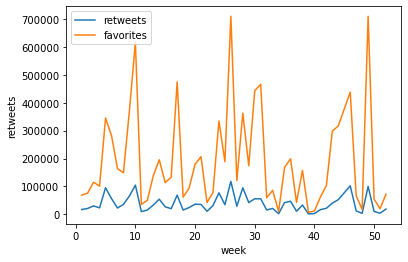

In [56]:
sns.lineplot(x = "week", y = "retweets", data = eng_weekly)
sns.lineplot(x = "week", y = "favorites", data = eng_weekly)
plt.legend(["retweets", "favorites"],loc="upper left")
plt.show()